In [1]:
import pyodbc

# สร้างการเชื่อมต่อกับ SQL Server
server = '192.168.101.219' 
database = 'DataforAnalysis' 
username = 'DATALYZER' 
password = 'NMB54321'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
# สร้าง Cursor
cursor = cnxn.cursor()

# ใส่คำสั่ง SQL ที่คุณต้องการตรวจสอบ
sql_query = "SELECT * FROM ชื่อตาราง WHERE CAST(วันที่ AS DATE) = CAST(GETDATE() AS DATE)"

# ประมวลผลคำสั่ง SQL
cursor.execute(sql_query)

# ดึงข้อมูล
results = cursor.fetchall()

# ตรวจสอบว่ามีข้อมูลหรือไม่
if len(results) > 0:
    print("มีข้อมูลเข้าในตารางวันนี้")
else:
    print("ไม่มีข้อมูลเข้าในตารางวันนี้")

# ปิดการเชื่อมต่อ
cursor.close()



ProgrammingError: ('42S02', "[42S02] [Microsoft][ODBC SQL Server Driver][SQL Server]Invalid object name 'ชื่อตาราง'. (208) (SQLExecDirectW)")

In [7]:
import pandas as pd
import numpy as np

In [8]:
import datetime
Date= datetime.datetime.now().date()
Line='3-6_IP'
Model='LONGSP'
Startdate=datetime.datetime.now().date()-datetime.timedelta(30)
finishDate=datetime.datetime.now().date()-datetime.timedelta(1)

In [9]:
import pyodbc
import pandas as pd
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = '192.168.101.219' 
database = 'DataforAnalysis' 
username = 'DATALYZER' 
password = 'NMB54321'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT [Projection1],[Datum_probe],convert(float,[Max_force]) as [Max_force],[Set_Dim_A],[Set_Dim_B],[Set_Dim_C],[Diecast_Pivot_2]FROM [Diecast].[dbo].[Pivot] join [TransportData].[dbo].[Matching_Auto_Unit1] on [Pivot].Diecast_S_N=[Matching_Auto_Unit1].Barcode_Base join [DataforAnalysis].[dbo].[DataML_Test] on [DataML_Test].Barcode_motor=[Matching_Auto_Unit1].Barcode_Motor   WHERE [DataML_Test].[Model] = '"+Model+"' AND [DataML_Test].[Line] = '3-6' AND [DataML_Test].[Date] BETWEEN '"+str(Startdate)+"' and '"+str(finishDate)+"'and ([Projection1] is not null and [Datum_probe] is not null and [Max_force] is not null and [Set_Dim_A] is not null and [Set_Dim_B] is not null and [Set_Dim_C] is not null and [Diecast_Pivot_2] is not null)and [Projection1] !='0' and [Projection1]>0 and [Projection1] < 1;"
datasets = pd.read_sql(query, cnxn)
print(datasets.head(100000))

C:\Users\IT\AppData\Local\Temp\ipykernel_6092\1226152176.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datasets = pd.read_sql(query, cnxn)


       Projection1  Datum_probe  Max_force  Set_Dim_A  Set_Dim_B  Set_Dim_C  \
0           0.5196   655.400024     1003.0     0.5182     0.4993     0.5082   
1           0.5578   578.130005     1234.0     0.5107     0.4945     0.5214   
2           0.5292   574.890015     1682.0     0.5095     0.4971     0.5108   
3           0.5180   693.599976      794.0     0.5368     0.5286     0.5244   
4           0.5224   703.979980     1724.0     0.5054     0.4953     0.5068   
...            ...          ...        ...        ...        ...        ...   
66589       0.5389   644.039978      934.0     0.5249     0.4989     0.5162   
66590       0.5275   641.780029      427.0     0.5203     0.5038     0.5140   
66591       0.5225   692.989990      559.0     0.5264     0.5223     0.5224   
66592       0.5298   642.760010      636.0     0.5299     0.5105     0.5190   
66593       0.5355   692.929993      459.0     0.5233     0.5233     0.5284   

       Diecast_Pivot_2  
0               9.3713  
1

In [10]:
query

"SELECT [Projection1],[Datum_probe],convert(float,[Max_force]) as [Max_force],[Set_Dim_A],[Set_Dim_B],[Set_Dim_C],[Diecast_Pivot_2]FROM [Diecast].[dbo].[Pivot] join [TransportData].[dbo].[Matching_Auto_Unit1] on [Pivot].Diecast_S_N=[Matching_Auto_Unit1].Barcode_Base join [DataforAnalysis].[dbo].[DataML_Test] on [DataML_Test].Barcode_motor=[Matching_Auto_Unit1].Barcode_Motor   WHERE [DataML_Test].[Model] = 'LONGSP' AND [DataML_Test].[Line] = '3-6' AND [DataML_Test].[Date] BETWEEN '2023-09-16' and '2023-10-15'and ([Projection1] is not null and [Datum_probe] is not null and [Max_force] is not null and [Set_Dim_A] is not null and [Set_Dim_B] is not null and [Set_Dim_C] is not null and [Diecast_Pivot_2] is not null)and [Projection1] !='0' and [Projection1]>0 and [Projection1] < 1;"

In [11]:
import pyodbc
import pandas as pd
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = '192.168.101.219' 
database = 'DataforAnalysis' 
username = 'DATALYZER' 
password = 'NMB54321'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# select 26 rows from SQL table to insert in dataframe.
query = "SELECT [Bin],[Bin2],[Datum_probe_Min],[Datum_probe_Max],[Max_force_Min],[Max_force_Max],[Set_Dim_A_Min],[Set_Dim_A_Max],[Set_Dim_B_Min],[Set_Dim_B_Max],[Set_Dim_C_Min],[Set_Dim_C_Max],[Pivot_Height_Min],[Pivot_Height_Max],[Pivot_2_Min],[Pivot_2_Max],[KPOV_Min],[KPOV_Max]FROM [DataforAnalysis].[dbo].[Reference];"
spec = pd.read_sql(query, cnxn)
print(spec.head(100000))

           Bin        Bin2 Datum_probe_Min Datum_probe_Max Max_force_Min  \
0   A           -4               -infinity          124.99     -infinity   
1   B           -3                     125          249.99           300   
2   C           -2                     250          374.99        833.33   
3   D           -1                     375          499.99       1366.67   
4   E           1                      500          624.99          1900   
5   F           2                      625          749.99       2433.33   
6   G           3                      750             875       2966.67   
7   H           4                   875.01       +infinity       3500.01   
8   Pass        Pass                                  None          None   
9   Fail        Fail                                  None          None   
10  Fail        Fail                  None            None          None   

   Max_force_Max Set_Dim_A_Min Set_Dim_A_Max Set_Dim_B_Min Set_Dim_B_Max  \
0         2

C:\Users\IT\AppData\Local\Temp\ipykernel_6092\445518909.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  spec = pd.read_sql(query, cnxn)


In [12]:
from pandas import DataFrame

data1 ={
'Date':Date,
'betweenDate':str(Startdate)+' - '+str(finishDate),
'Model':Model,
'Line':Line,

'describe1':['count','mean','std','min','25%','50%','75%','max'
],
'Datum_probe':datasets.describe()['Datum_probe'],
'Max_force':datasets.describe()['Max_force'],
'Set_Dim_A':datasets.describe()['Set_Dim_A'],
'Set_Dim_B':datasets.describe()['Set_Dim_B'],
'Set_Dim_C':datasets.describe()['Set_Dim_C'],
'Diecast_Pivot_2':datasets.describe()['Diecast_Pivot_2'],
'Projection':datasets.describe()['Projection1'],
}
dff1 = pd.DataFrame(data1,columns=['Date','betweenDate','Model','Line','describe1',str('Datum_probe'),str('Max_force'),str('Set_Dim_A'),str('Set_Dim_B'),str('Set_Dim_C'),str('Diecast_Pivot_2'),str('Projection')])
print("displaying the dataframe with data as record")
print(dff1)
print("-------------------------------Converting into csv file with a new a new file name ------------------------------------")
# dff1.to_csv("C:\\Users\\IT\\Desktop\\Date ML\\LSP3-10 Accuracy.csv")
# dff1=pd.read_csv("C:\\Users\\IT\\Desktop\\Date ML\\LSP3-10 Accuracy.csv")
# print(dff1)

displaying the dataframe with data as record
             Date              betweenDate   Model    Line describe1  \
count  2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP     count   
mean   2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP      mean   
std    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       std   
min    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       min   
25%    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       25%   
50%    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       50%   
75%    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       75%   
max    2023-10-16  2023-09-16 - 2023-10-15  LONGSP  3-6_IP       max   

        Datum_probe     Max_force     Set_Dim_A     Set_Dim_B     Set_Dim_C  \
count  66594.000000  66594.000000  66594.000000  66594.000000  66594.000000   
mean     661.417599    962.002913      0.519922      0.512235      0.520124   
std       38.277668    386.604873      0.009097      0.011956      0.

In [13]:
import pyodbc
import pandas as pd
# insert data from csv file into dataframe.
# working directory for csv file: type "pwd" in Azure Data Studio or Linux
# working directory in Windows c:\users\username
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = '192.168.101.219' 
database = 'DataforAnalysis' 
username = 'DATALYZER' 
password = 'NMB54321'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:
for index, row in dff1.iterrows():
     cursor.execute("INSERT INTO [DataforAnalysis].[dbo].[DescribeML](Date,betweenDate,Model,Line,describe1,Datum_probe,Max_force,Set_Dim_A,Set_Dim_B,Set_Dim_C,Diecast_Pivot_2,Projection) values ('"+str(row.Date)+"','"+row.betweenDate+"','"+row.Model+"','"+row.Line+"','"+str(row.describe1)+"','"+str(row.Datum_probe)+"','"+str(row.Max_force)+"','"+str(row.Set_Dim_A)+"','"+str(row.Set_Dim_B)+"','"+str(row.Set_Dim_C)+"','"+str(row.Diecast_Pivot_2)+"','"+str(row.Projection)+"')")

cnxn.commit()
cursor.close()

In [14]:
datasets['Projection1']=pd.cut(datasets['Projection1'],bins=[-np.inf,spec['KPOV_Max'][9],spec['KPOV_Max'][8],np.inf],labels=['fail_low','pass','fail_high'])
datasets['Projection1'].replace('fail_low','fail',inplace=True)
datasets['Projection1'].replace('fail_high','fail',inplace=True)

In [15]:
from collections import Counter
print(Counter(datasets['Projection1']))

Counter({'pass': 65431, 'fail': 1163})


In [16]:
from imblearn.over_sampling import SMOTE
# over_sampling คือการทำค่า fail 1284 ให้เท่ากับค่า pass 271k เพื่อให้ data ในการ train เพิ่มมากขึ้น
from collections import Counter

k = 3
X = datasets.loc[:, datasets.columns != 'Projection1']
y = datasets.Projection1

# sampling_strategy=0.1 oversampling 10%
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=100)
X_res, y_res = sm.fit_resample(X, y)

datasets = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [17]:
from collections import Counter
print(Counter(datasets['Projection1']))

Counter({'pass': 65431, 'fail': 65431})


In [18]:
Datum_3LCL = spec['Datum_probe_Max'][0]
Datum_2LCL = spec['Datum_probe_Max'][1]
Datum_LCL = spec['Datum_probe_Max'][2]
Datum_CL = spec['Datum_probe_Max'][3]
Datum_UCL = spec['Datum_probe_Max'][4]
Datum_2UCL = spec['Datum_probe_Max'][5]
Datum_3UCL = spec['Datum_probe_Max'][6]

Max_3LCL = spec['Max_force_Max'][0]
Max_2LCL = spec['Max_force_Max'][1]
Max_LCL = spec['Max_force_Max'][2]
Max_CL = spec['Max_force_Max'][3]
Max_UCL = spec['Max_force_Max'][4]
Max_2UCL = spec['Max_force_Max'][5]
Max_3UCL = spec['Max_force_Max'][6]

Set_Dim_A_3LCL = spec['Set_Dim_A_Max'][0]
Set_Dim_A_2LCL = spec['Set_Dim_A_Max'][1]
Set_Dim_A_LCL = spec['Set_Dim_A_Max'][2]
Set_Dim_A_CL = spec['Set_Dim_A_Max'][3]
Set_Dim_A_UCL = spec['Set_Dim_A_Max'][4]
Set_Dim_A_2UCL = spec['Set_Dim_A_Max'][5]
Set_Dim_A_3UCL = spec['Set_Dim_A_Max'][6]
print(spec['Set_Dim_A_Max'][0])
print(spec['Set_Dim_A_Max'][1])
print(spec['Set_Dim_A_Max'][2])
print(spec['Set_Dim_A_Max'][3])
print(spec['Set_Dim_A_Max'][4])
print(spec['Set_Dim_A_Max'][5])
print(spec['Set_Dim_A_Max'][6])

Set_Dim_B_3LCL = spec['Set_Dim_B_Max'][0]
Set_Dim_B_2LCL = spec['Set_Dim_B_Max'][1]
Set_Dim_B_LCL = spec['Set_Dim_B_Max'][2]
Set_Dim_B_CL = spec['Set_Dim_B_Max'][3]
Set_Dim_B_UCL = spec['Set_Dim_B_Max'][4]
Set_Dim_B_2UCL = spec['Set_Dim_B_Max'][5]
Set_Dim_B_3UCL = spec['Set_Dim_B_Max'][6]

Set_Dim_C_3LCL = spec['Set_Dim_C_Max'][0]
Set_Dim_C_2LCL = spec['Set_Dim_C_Max'][1]
Set_Dim_C_LCL = spec['Set_Dim_C_Max'][2]
Set_Dim_C_CL = spec['Set_Dim_C_Max'][3]
Set_Dim_C_UCL = spec['Set_Dim_C_Max'][4]
Set_Dim_C_2UCL = spec['Set_Dim_C_Max'][5]
Set_Dim_C_3UCL = spec['Set_Dim_C_Max'][6]


Diecast_Pivot_2_3LCL = spec['Pivot_2_Max'][0]
Diecast_Pivot_2_2LCL = spec['Pivot_2_Max'][1]
Diecast_Pivot_2_LCL = spec['Pivot_2_Max'][2]
Diecast_Pivot_2_CL = spec['Pivot_2_Max'][3]
Diecast_Pivot_2_UCL = spec['Pivot_2_Max'][4]
Diecast_Pivot_2_2UCL = spec['Pivot_2_Max'][5]
Diecast_Pivot_2_3UCL = spec['Pivot_2_Max'][6]


datasets['Datum_probe']=pd.cut(datasets['Datum_probe'],bins=[-np.inf, float(Datum_3LCL), float(Datum_2LCL), float(Datum_LCL), float(Datum_CL), float(Datum_UCL), float(Datum_2UCL), float(Datum_3UCL), np.inf],labels=[-4,-3,-2,-1,1,2,3,4])

datasets['Max_force']=pd.cut(datasets['Max_force'],bins=[-np.inf, float(Max_3LCL), float(Max_2LCL), float(Max_LCL), float(Max_CL),float(Max_UCL),float(Max_2UCL),float(Max_3UCL), np.inf],labels=[-4,-3,-2,-1,1,2,3,4])

datasets['Set_Dim_A']=pd.cut(datasets['Set_Dim_A'],bins=[-np.inf, float(Set_Dim_A_3LCL), float(Set_Dim_A_2LCL), float(Set_Dim_A_LCL),float(Set_Dim_A_CL),float(Set_Dim_A_UCL),float(Set_Dim_A_2UCL),float(Set_Dim_A_3UCL),np.inf],labels=[-4,-3,-2,-1,1,2,3,4])

datasets['Set_Dim_B']=pd.cut(datasets['Set_Dim_B'],bins=[-np.inf, float(Set_Dim_B_3LCL), float(Set_Dim_B_2LCL), float(Set_Dim_B_LCL), float(Set_Dim_B_CL), Set_Dim_B_UCL, Set_Dim_B_2UCL, Set_Dim_B_3UCL, np.inf],labels=[-4,-3,-2,-1,1,2,3,4])

datasets['Set_Dim_C']=pd.cut(datasets['Set_Dim_C'],bins=[-np.inf, float(Set_Dim_C_3LCL), float(Set_Dim_C_2LCL), float(Set_Dim_C_LCL), float(Set_Dim_C_CL), float(Set_Dim_C_UCL),float(Set_Dim_C_2UCL),float(Set_Dim_C_3UCL), np.inf],labels=[-4,-3,-2,-1,1,2,3,4])

datasets['Diecast_Pivot_2']=pd.cut(datasets['Diecast_Pivot_2'],bins=[-np.inf, float(Diecast_Pivot_2_3LCL), float(Diecast_Pivot_2_2LCL),float(Diecast_Pivot_2_LCL),float(Diecast_Pivot_2_CL),float(Diecast_Pivot_2_UCL),float(Diecast_Pivot_2_2UCL),float(Diecast_Pivot_2_3UCL),np.inf],labels=[-4,-3,-2,-1,1,2,3,4])


0.4774
0.4901
0.5028
0.5155
0.5282
0.5409
0.5537


In [19]:
datasets

,Datum_probe,Max_force,Set_Dim_A,Set_Dim_B,Set_Dim_C,Diecast_Pivot_2,Projection1
0,2,-2,1,-2,-1,-1,pass
1,1,-2,-1,-2,1,-1,pass
2,1,-1,-1,-2,-1,-1,pass
3,2,-3,2,2,1,1,pass
4,2,-1,-1,-2,-1,1,pass
...,...,...,...,...,...,...,...
130857,2,-1,1,-1,2,1,fail
130858,2,-2,1,1,-2,1,fail
130859,2,-2,1,-1,2,-1,fail
130860,2,-2,2,1,2,1,fail


In [20]:
from pyarc import CBA, TransactionDB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

train, test = train_test_split(datasets, test_size=0.1)

txns_train = TransactionDB.from_DataFrame(train)
txns_test = TransactionDB.from_DataFrame(test)

cba = CBA (support = 0.04, confidence = 0.7, algorithm ='m1')
cba.fit(txns_train)

y_pred = cba.predict(txns_test)
y_test = test['Projection1']
print ((classification_report(y_test,y_pred)))


              precision    recall  f1-score   support

        fail       0.89      0.83      0.86      6540
        pass       0.84      0.90      0.87      6547

    accuracy                           0.87     13087
   macro avg       0.87      0.87      0.86     13087
weighted avg       0.87      0.87      0.86     13087



In [21]:
cba.clf.rules

[CAR {Max_force=-2,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.05 conf: 1.00 len: 4, id: 107,
 CAR {Set_Dim_C=1,Diecast_Pivot_2=-1,Datum_probe=2,Max_force=-3} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 5, id: 79,
 CAR {Diecast_Pivot_2=-1,Datum_probe=2,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.05 conf: 1.00 len: 5, id: 104,
 CAR {Diecast_Pivot_2=-1,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.06 conf: 1.00 len: 4, id: 105,
 CAR {Set_Dim_B=-2,Set_Dim_C=2,Datum_probe=1} => {Projection1=fail} sup: 0.05 conf: 1.00 len: 4, id: 46,
 CAR {Set_Dim_B=-2,Set_Dim_C=2} => {Projection1=fail} sup: 0.10 conf: 1.00 len: 3, id: 72,
 CAR {Set_Dim_B=1,Datum_probe=2,Max_force=-3,Set_Dim_C=1} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 5, id: 32,
 CAR {Set_Dim_C=1,Datum_probe=2,Max_force=-3,Set_Dim_A=1} => {Projection1=pass} sup: 0.07 conf: 1.00 len: 5, id: 84,
 CAR {Set_Dim_B=1,Max_force=-3,Set_Dim_C=1} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 4, id: 33,
 C

In [26]:
import pandas as pd
import re
text = str(cba.clf.rules)
print(f"text",text)
        # Split the text into CAR items
car_items = re.split(r' CAR ', text)[1:]  # Start from index 1 to skip the first empty item

        # Initialize lists to store extracted data
# Initialize lists to store data
KPIV_list = []
KPOV_list = []
sup_list = []
conf_list = []
len_list = []
id_list = []

# Loop through CAR items and extract data
for car_item in car_items:
    # Extract KPIV
        kpi_match = re.search(r'{(.*?)}', car_item)
        if kpi_match:
            kpi_data = kpi_match.group(1)
            KPIV_list.append(kpi_data.strip())
        else:
            KPIV_list.append(None)

    # Extract KPOV
pov_match = re.search(r'=> {(.*?)}', car_item)
if pov_match:
        pov_data = pov_match.group(1)
        KPOV_list.append(pov_data.strip())
else:
        KPOV_list.append(None)

    # Extract sup
sup_match = re.search(r'sup: (.*?),', car_item)
if sup_match:
        sup_data = sup_match.group(1).strip()
        sup_list.append(sup_data)
else:
        sup_list.append(None)

    # Extract conf
conf_match = re.search(r'conf: (.*?),', car_item)
if conf_match:
        conf_data = conf_match.group(1).strip()
        conf_list.append(conf_data)
else:
        conf_list.append(None)

    # Extract len
len_match = re.search(r'len: (.*?),', car_item)
if len_match:
        len_data = len_match.group(1).strip()
        len_list.append(len_data)
else:
        len_list.append(None)

    # Extract id
id_match = re.search(r'id: (.*?),', car_item)
if id_match:
        id_data = id_match.group(1).strip()
        id_list.append(id_data)
else:
        id_list.append(None)

# Create DataFrames from the extracted data
data_KPIV = {'KPIV': KPIV_list, 'id': id_list}
data_KPOV = {'KPOV': KPOV_list, 'id': id_list}
print(data_KPIV)
print(data_KPOV)
data_additional = {'sup': sup_list, 'conf': conf_list, 'len': len_list, 'id': id_list}

df_KPIV = pd.DataFrame(data_KPIV)
df_KPOV = pd.DataFrame(data_KPOV)
df_additional = pd.DataFrame(data_additional)

# Extract 'id' from df_id and 'sup' from df_additional
data_id = {'id': id_list}
df_id = pd.DataFrame(data_id)
df_additional = pd.concat([df_id, df_additional], axis=1)  # Combine 'id' with 'sup' in df_additional

data_KPIV = {'KPIV': KPIV_list, 'id': id_list}  # เพิ่มคอลัมน์ 'id' ใน data_KPIV
data_KPOV = {'KPOV': KPOV_list, 'id': id_list}  # เพิ่มคอลัมน์ 'id' ใน data_KPOV

df_KPIV = pd.DataFrame(data_KPIV)
df_KPOV = pd.DataFrame(data_KPOV)

# Pivot 'KPIV' and 'KPOV' columns
pivoted_df_KPIV = df_KPIV.pivot(index='id', columns='KPIV', values='KPIV1')
pivoted_df_KPOV = df_KPOV.pivot(index='id', columns='KPOV', values='KPOV1')

# Reset the index for both pivoted DataFrames
pivoted_df_KPIV.reset_index(inplace=True)
pivoted_df_KPOV.reset_index(inplace=True)

# Combine the DataFrames as needed
merged_df = pd.concat([df_additional, pivoted_df_KPIV, pivoted_df_KPOV], axis=1)

# Reorder the columns as desired
column_order = ['sup'] + [col for col in merged_df.columns if col != 'sup']
merged_df = merged_df[column_order]

# Add an 'index' column
merged_df['id'] = range(len(merged_df))
column_order = ['index'] + [col for col in merged_df.columns if col != 'index']
merged_df = merged_df[column_order]

# Convert the DataFrame to a list of dictionaries (JSON)
json_data = merged_df.where(pd.notna(merged_df), None).to_dict(orient='records')
# classification_results_json = df_classification_results.to_json(orient='records')



response_data = {
            "json_data": json_data,
            # "classification_results_json": classification_results_json
   
        }

print(f"*********************json_data**********************",json_data)
    # print(f"*********************classification_results_json**********************",classification_results_json)


text [CAR {Max_force=-2,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.05 conf: 1.00 len: 4, id: 107, CAR {Set_Dim_C=1,Diecast_Pivot_2=-1,Datum_probe=2,Max_force=-3} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 5, id: 79, CAR {Diecast_Pivot_2=-1,Datum_probe=2,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.05 conf: 1.00 len: 5, id: 104, CAR {Diecast_Pivot_2=-1,Set_Dim_C=1,Set_Dim_B=-1} => {Projection1=pass} sup: 0.06 conf: 1.00 len: 4, id: 105, CAR {Set_Dim_B=-2,Set_Dim_C=2,Datum_probe=1} => {Projection1=fail} sup: 0.05 conf: 1.00 len: 4, id: 46, CAR {Set_Dim_B=-2,Set_Dim_C=2} => {Projection1=fail} sup: 0.10 conf: 1.00 len: 3, id: 72, CAR {Set_Dim_B=1,Datum_probe=2,Max_force=-3,Set_Dim_C=1} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 5, id: 32, CAR {Set_Dim_C=1,Datum_probe=2,Max_force=-3,Set_Dim_A=1} => {Projection1=pass} sup: 0.07 conf: 1.00 len: 5, id: 84, CAR {Set_Dim_B=1,Max_force=-3,Set_Dim_C=1} => {Projection1=pass} sup: 0.04 conf: 1.00 len: 4, id: 33, CAR {

ValueError: All arrays must be of the same length

In [ ]:
import pandas as pd
import re

# Sample text containing rules

text = str(cba.clf.rules)

# Split the text into CAR items
car_items = re.split(r' CAR ', text)[1:]  # Start from index 1 to skip the first empty item

# Initialize lists to store extracted data
KPIV_list = []
KPOV_list = []
sup_list = []
conf_list = []
len_list = []
id_list = []

# Loop through car items and extract data
for car_item in car_items:
    # Extract KPIV
    kpi_match = re.search(r'{(.*?)}', car_item)
    if kpi_match:
        kpi_data = kpi_match.group(1)
        KPIV_list.append(kpi_data.strip())
    else:
        KPIV_list.append(None)

    # Extract KPOV
    pov_match = re.search(r'=> {(.*?)}', car_item)
    if pov_match:
        pov_data = pov_match.group(1)
        KPOV_list.append(pov_data.strip())
    else:
        KPOV_list.append(None)

    # Extract sup
    sup_match = re.search(r'sup: (.*?),', car_item)
    if sup_match:
        sup_data = sup_match.group(1).strip()
        sup_list.append(sup_data)
    else:
        sup_list.append(None)

    # Extract conf
    conf_match = re.search(r'conf: (.*?),', car_item)
    if conf_match:
        conf_data = conf_match.group(1).strip()
        conf_list.append(conf_data)
    else:
        conf_list.append(None)

    # Extract len
    len_match = re.search(r'len: (.*?),', car_item)
    if len_match:
        len_data = len_match.group(1).strip()
        len_list.append(len_data)
    else:
        len_list.append(None)

    # Extract id
    id_match = re.search(r'id: (.*?),', car_item)
    if id_match:
        id_data = id_match.group(1).strip()
        id_list.append(id_data)
    else:
        id_list.append(None)

# Create DataFrames from the extracted data
data_KPIV = {
    'KPIV': [kpi.split('=')[0] if kpi else None for kpi in KPIV_list],
    'KPIV1': [kpi.split('=')[-1] if kpi else None for kpi in KPIV_list],
    'id': id_list
}

data_KPOV = {
    'KPOV': [kpi.split('=')[0] if kpi else None for kpi in KPOV_list],
    'KPOV1': [kpi.split('=')[-1] if kpi else None for kpi in KPOV_list],
    'id': id_list
}

data_additional = {
    'conf': [kpi.split(' ')[0] if kpi else None for kpi in conf_list],
    'len': len_list,
    'id': id_list,
    'sup': [kpi.split(' ')[0] if kpi else None for kpi in sup_list],
}

df_KPIV = pd.DataFrame(data_KPIV)
df_KPOV = pd.DataFrame(data_KPOV)
df_additional = pd.DataFrame(data_additional)

# Pivot 'KPIV' and 'KPOV' columns
pivoted_df_KPIV = df_KPIV.pivot(index='id', columns='KPIV', values='KPIV1')
pivoted_df_KPOV = df_KPOV.pivot(index='id', columns='KPOV', values='KPOV1')

# Reset the index
pivoted_df_KPIV.reset_index(inplace=True)
pivoted_df_KPOV.reset_index(inplace=True)

# Merge DataFrames
merged_df = pd.merge(df_additional, pivoted_df_KPIV, on='id', how='outer')
merged_df = pd.merge(merged_df, pivoted_df_KPOV, on='id', how='outer')

# Reorder the columns as desired
column_order = ['sup'] + [col for col in merged_df.columns if col != 'sup']
merged_df = merged_df[column_order]


print(merged_df.head())

json_data = merged_df.to_dict(orient='records')

    sup  conf len   id Datum_probe Max_force Set_Dim_A Set_Dim_B Set_Dim_C  \
0  0.04  1.00   4  626         NaN       NaN       NaN         2       NaN   
1  0.06  1.00   5  672         NaN       NaN       NaN       NaN        -3   
2  0.07  0.99   3  627         NaN       NaN       NaN         2       NaN   
3  0.05  0.99   5  606         NaN       NaN       NaN       NaN         1   
4  0.04  0.99   4  605         NaN       NaN       NaN       NaN         1   

  Projection1  
0        fail  
1        pass  
2        fail  
3        pass  
4        pass  


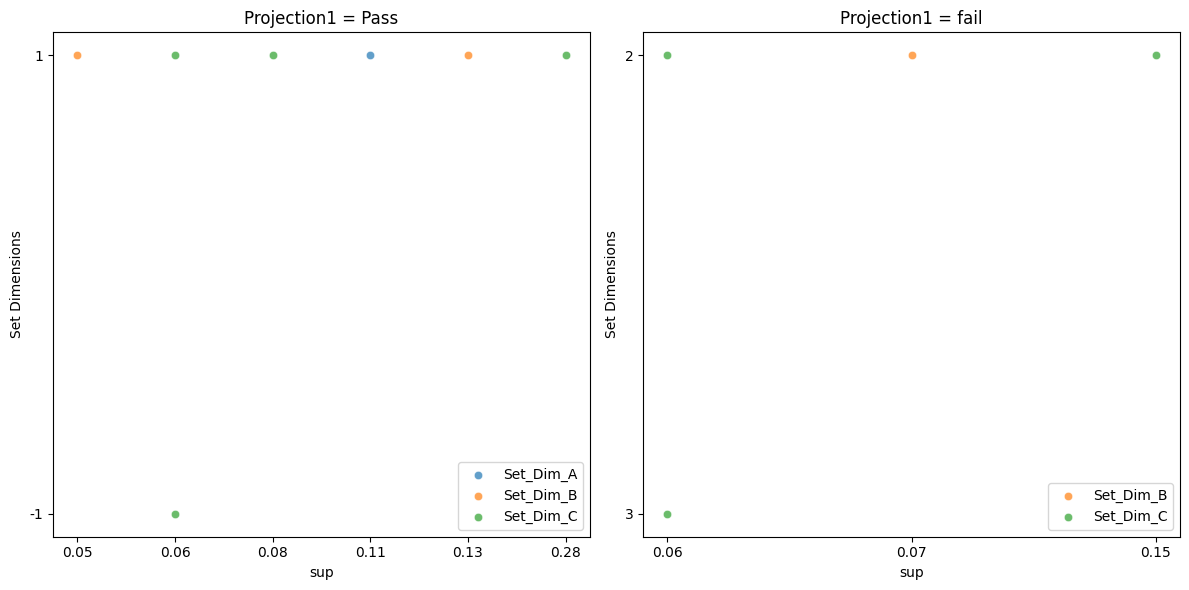

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [{'index': 0, 'sup': '0.05', 'conf': '0.82', 'len': '4', 'id': '17', 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 1, 'sup': '0.06', 'conf': '0.83', 'len': '3', 'id': '16', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 2, 'sup': '0.06', 'conf': '0.76', 'len': '4', 'id': '4', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '-1', 'Projection1': 'Pass'},
 {'index': 3, 'sup': '0.08', 'conf': '0.80', 'len': '3', 'id': '24', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 4, 'sup': '0.11', 'conf': '0.74', 'len': '3', 'id': '8', 'Set_Dim_A': '1', 'Set_Dim_B': None, 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 5, 'sup': '0.13', 'conf': '0.97', 'len': '2', 'id': None, 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 6, 'sup': '0.28', 'conf': '0.78', 'len': '2', 'id': '26', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 7, 'sup': '0.06', 'conf': '0.95', 'len': '2', 'id': '0', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '3', 'Projection1': 'fail'},
 {'index': 8, 'sup': '0.06', 'conf': '0.82', 'len': '3', 'id': '23', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'},
 {'index': 9, 'sup': '0.07', 'conf': '0.85', 'len': '3', 'id': '11', 'Set_Dim_A': None, 'Set_Dim_B': '2', 'Set_Dim_C': None, 'Projection1': 'fail'},
 {'index': 10, 'sup': '0.15', 'conf': '0.75', 'len': '3', 'id': '5', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'}]

df = pd.DataFrame(data)

# สร้างกราฟแผนภาพ
plt.figure(figsize=(12, 6))

# กราฟของ 'Pass'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['Projection1'] == 'Pass'], x='sup', y='Set_Dim_A', label='Set_Dim_A', alpha=0.7)
sns.scatterplot(data=df[df['Projection1'] == 'Pass'], x='sup', y='Set_Dim_B', label='Set_Dim_B', alpha=0.7)
sns.scatterplot(data=df[df['Projection1'] == 'Pass'], x='sup', y='Set_Dim_C', label='Set_Dim_C', alpha=0.7)
plt.xlabel('sup')
plt.ylabel('Set Dimensions')
plt.title('Projection1 = Pass')
plt.legend()

# กราฟของ 'fail'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['Projection1'] == 'fail'], x='sup', y='Set_Dim_A', label='Set_Dim_A', alpha=0.7)
sns.scatterplot(data=df[df['Projection1'] == 'fail'], x='sup', y='Set_Dim_B', label='Set_Dim_B', alpha=0.7)
sns.scatterplot(data=df[df['Projection1'] == 'fail'], x='sup', y='Set_Dim_C', label='Set_Dim_C', alpha=0.7)
plt.xlabel('sup')
plt.ylabel('Set Dimensions')
plt.title('Projection1 = fail')
plt.legend()

plt.tight_layout()
plt.show()


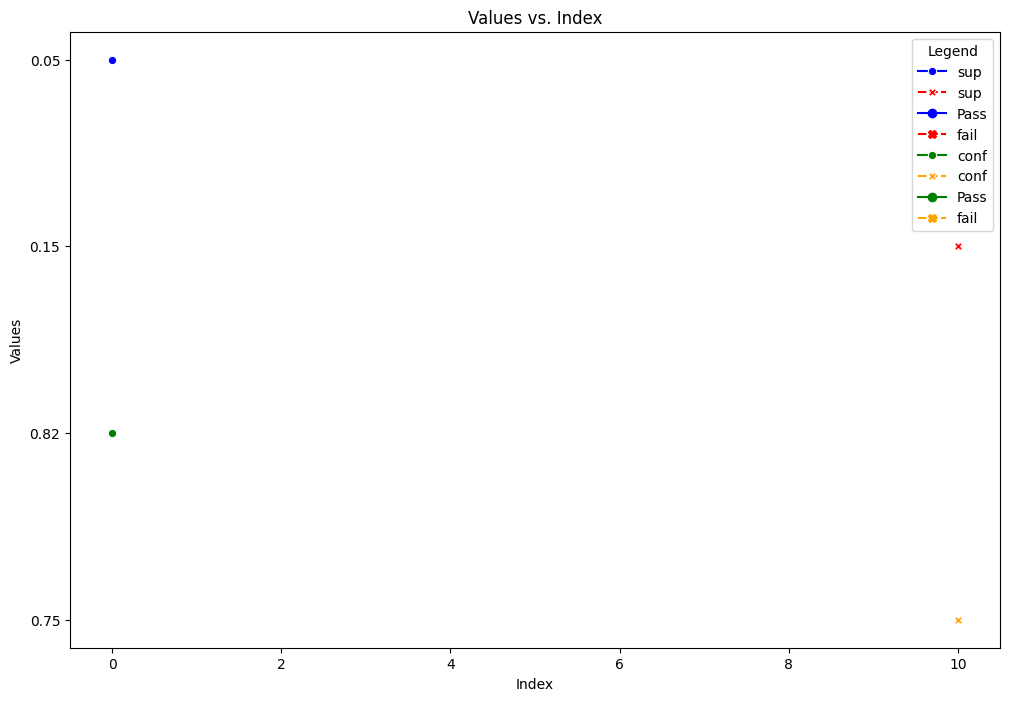

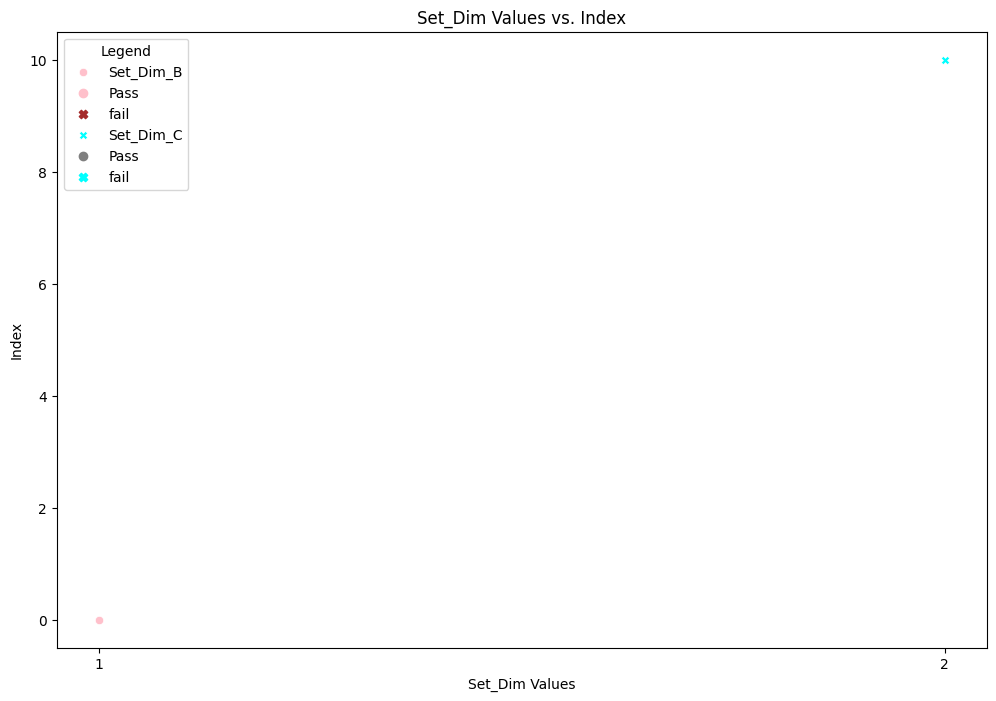

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ข้อมูล JSON ที่ให้มา
data = [{'index': 0, 'sup': '0.05', 'conf': '0.82', 'len': '4', 'id': '17', 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 1, 'sup': '0.06', 'conf': '0.83', 'len': '3', 'id': '16', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 2, 'sup': '0.06', 'conf': '0.76', 'len': '4', 'id': '4', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '-1', 'Projection1': 'Pass'},
 {'index': 3, 'sup': '0.08', 'conf': '0.80', 'len': '3', 'id': '24', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 4, 'sup': '0.11', 'conf': '0.74', 'len': '3', 'id': '8', 'Set_Dim_A': '1', 'Set_Dim_B': None, 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 5, 'sup': '0.13', 'conf': '0.97', 'len': '2', 'id': None, 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 6, 'sup': '0.28', 'conf': '0.78', 'len': '2', 'id': '26', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 7, 'sup': '0.06', 'conf': '0.95', 'len': '2', 'id': '0', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '3', 'Projection1': 'fail'},
 {'index': 8, 'sup': '0.06', 'conf': '0.82', 'len': '3', 'id': '23', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'},
 {'index': 9, 'sup': '0.07', 'conf': '0.85', 'len': '3', 'id': '11', 'Set_Dim_A': None, 'Set_Dim_B': '2', 'Set_Dim_C': None, 'Projection1': 'fail'},
 {'index': 10, 'sup': '0.15', 'conf': '0.75', 'len': '3', 'id': '5', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'}]

# สร้าง DataFrame จากข้อมูล JSON
df = pd.DataFrame(data)

# สร้างกราฟเส้นสำหรับ 'sup' และ 'conf'
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='index', y='sup', hue='Projection1', style='Projection1', markers=True, palette={'Pass': 'blue', 'fail': 'red'}, label='sup')
sns.lineplot(data=df, x='index', y='conf', hue='Projection1', style='Projection1', markers=True, palette={'Pass': 'green', 'fail': 'orange'}, label='conf')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values vs. Index')
plt.legend(title='Legend')

# สร้างกราฟแยกสำหรับ 'Set_Dim_A'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='index', y='Set_Dim_A', hue='Projection1', style='Projection1', markers=True, palette={'Pass': 'purple', 'fail': 'yellow'}, label='Set_Dim_A')
plt.xlabel('Index')
plt.ylabel('Set_Dim_A Values')
plt.title('Set_Dim_A Values vs. Index')
plt.legend(title='Legend')

# สร้างกราฟแยกสำหรับ 'Set_Dim_B'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='index', y='Set_Dim_B', hue='Projection1', style='Projection1', markers=True, palette={'Pass': 'pink', 'fail': 'brown'}, label='Set_Dim_B')
plt.xlabel('Index')
plt.ylabel('Set_Dim_B Values')
plt.title('Set_Dim_B Values vs. Index')
plt.legend(title='Legend')

# สร้างกราฟแยกสำหรับ 'Set_Dim_C'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='index', y='Set_Dim_C', hue='Projection1', style='Projection1', markers=True, palette={'Pass': 'gray', 'fail': 'cyan'}, label='Set_Dim_C')
plt.xlabel('Index')
plt.ylabel('Set_Dim_C Values')
plt.title('Set_Dim_C Values vs. Index')
plt.legend(title='Legend')

plt.show()


In [ ]:
KPIV_list = [
    'Set_Dim_C=-1', 'Set_Dim_C=3', 'Set_Dim_A=2,Set_Dim_C=2', 'Set_Dim_C=2,Set_Dim_B=-2',
    'Set_Dim_B=1,Set_Dim_C=1', 'Set_Dim_A=-1,Set_Dim_C=1', 'Set_Dim_C=2', 'Set_Dim_B=-1,Set_Dim_A=1,Set_Dim_C=1'
]

KPOV_list = [
    'Projection1=Pass', 'Projection1=fail', 'Projection1=fail', 'Projection1=fail',
    'Projection1=Pass', 'Projection1=Pass', 'Projection1=fail', 'Projection1=Pass'
]

sup_list = ['0.13 conf: 0.97 len: 2', '0.06 conf: 0.95 len: 2', '0.06 conf: 0.84 len: 3', '0.06 conf: 0.84 len: 3',
           '0.08 conf: 0.82 len: 3', '0.06 conf: 0.79 len: 3', '0.28 conf: 0.78 len: 2', '0.06 conf: 0.76 len: 4']

# Splitting the KPIV_list and KPOV_list
KPIV_list = [item.split(',') for item in KPIV_list]
KPOV_list = [item.split(',') for item in KPOV_list]

# Splitting the sup_list and extracting 'conf' and 'len'
conf_list = ['conf:' + item.split('conf:')[1].split(' ')[0] if 'conf:' in item else None for item in sup_list]
len_list = ['len:' + item.split('len:')[1] if 'len:' in item else None for item in sup_list]

# Extracting 'id' and handling None values
id_list = [3, 0, 4, 8, 12, 6, 18, None]  # Replace with your actual data or a similar structure

# Now you can use 'id_list' as intended
# For example, handling None values in 'id_list':
id_list = [item if item is not None else None for item in id_list]

# Print the resulting 'id_list'
print("\nid_list")
print(id_list)

print("KPIV_list")
print(KPIV_list)
print("\nKPOV_list")
print(KPOV_list)
print("\nconf_list")
print(conf_list)
print("\nlen_list")
print(len_list)
print("\nid_list")
print(id_list)



id_list
[3, 0, 4, 8, 12, 6, 18, None]
KPIV_list
[['Set_Dim_C=-1'], ['Set_Dim_C=3'], ['Set_Dim_A=2', 'Set_Dim_C=2'], ['Set_Dim_C=2', 'Set_Dim_B=-2'], ['Set_Dim_B=1', 'Set_Dim_C=1'], ['Set_Dim_A=-1', 'Set_Dim_C=1'], ['Set_Dim_C=2'], ['Set_Dim_B=-1', 'Set_Dim_A=1', 'Set_Dim_C=1']]

KPOV_list
[['Projection1=Pass'], ['Projection1=fail'], ['Projection1=fail'], ['Projection1=fail'], ['Projection1=Pass'], ['Projection1=Pass'], ['Projection1=fail'], ['Projection1=Pass']]

conf_list
['conf:', 'conf:', 'conf:', 'conf:', 'conf:', 'conf:', 'conf:', 'conf:']

len_list
['len: 2', 'len: 2', 'len: 3', 'len: 3', 'len: 3', 'len: 3', 'len: 2', 'len: 4']

id_list
[3, 0, 4, 8, 12, 6, 18, None]


In [ ]:
data = "CAR {Set_Dim_C=4} => {Projection1=fail} sup: 0.02 conf: 0.99 len: 2, id: 5, CAR {Set_Dim_B=2,Set_Dim_C=-1} => {Projection1=Pass} sup: 0.01 conf: 0.99 len: 3, id: 21, CAR {Set_Dim_C=-1,Set_Dim_A=-1} => {Projection1=Pass} sup: 0.03 conf: 0.98 len: 3, id: 30, CAR {Set_Dim_C=-1,Set_Dim_A=2} => {Projection1=Pass} sup: 0.02 conf: 0.98 len: 3, id: 28, CAR {Set_Dim_B=-1,Set_Dim_C=-1,Set_Dim_A=1} => {Projection1=Pass} sup: 0.03 conf: 0.98 len: 4, id: 35"

# แบ่งข้อมูลเป็นรายการโดยใช้ ',' เป็นตัวแบ่งรายการ
data_list = data.split(',')

# สร้างรายการเพื่อเก็บข้อมูลแต่ละรายการ
parsed_data = []

for item in data_list:
    # แยกข้อมูลเป็นคำหลักและค่า
    parts = item.strip().split('=>')
    if len(parts) == 2:
        key = parts[0].strip()
        value = parts[1].strip()
        parsed_data.append((key, value))

# แสดงข้อมูลที่ได้
for key, value in parsed_data:
    print(key)
    print(value)
    print("==========")

CAR {Set_Dim_C=4}
{Projection1=fail} sup: 0.02 conf: 0.99 len: 2
Set_Dim_C=-1}
{Projection1=Pass} sup: 0.01 conf: 0.99 len: 3
Set_Dim_A=-1}
{Projection1=Pass} sup: 0.03 conf: 0.98 len: 3
Set_Dim_A=2}
{Projection1=Pass} sup: 0.02 conf: 0.98 len: 3
Set_Dim_A=1}
{Projection1=Pass} sup: 0.03 conf: 0.98 len: 4


In [ ]:
data = [{'index': 0, 'sup': '0.05', 'conf': '0.82', 'len': '4', 'id': '17', 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 1, 'sup': '0.06', 'conf': '0.83', 'len': '3', 'id': '16', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 2, 'sup': '0.06', 'conf': '0.76', 'len': '4', 'id': '4', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '-1', 'Projection1': 'Pass'},
 {'index': 3, 'sup': '0.08', 'conf': '0.80', 'len': '3', 'id': '24', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 4, 'sup': '0.11', 'conf': '0.74', 'len': '3', 'id': '8', 'Set_Dim_A': '1', 'Set_Dim_B': None, 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 5, 'sup': '0.13', 'conf': '0.97', 'len': '2', 'id': None, 'Set_Dim_A': None, 'Set_Dim_B': '1', 'Set_Dim_C': None, 'Projection1': 'Pass'},
 {'index': 6, 'sup': '0.28', 'conf': '0.78', 'len': '2', 'id': '26', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '1', 'Projection1': 'Pass'},
 {'index': 7, 'sup': '0.06', 'conf': '0.95', 'len': '2', 'id': '0', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '3', 'Projection1': 'fail'},
 {'index': 8, 'sup': '0.06', 'conf': '0.82', 'len': '3', 'id': '23', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'},
 {'index': 9, 'sup': '0.07', 'conf': '0.85', 'len': '3', 'id': '11', 'Set_Dim_A': None, 'Set_Dim_B': '2', 'Set_Dim_C': None, 'Projection1': 'fail'},
 {'index': 10, 'sup': '0.15', 'conf': '0.75', 'len': '3', 'id': '5', 'Set_Dim_A': None, 'Set_Dim_B': None, 'Set_Dim_C': '2', 'Projection1': 'fail'}]

# สร้างโครงสร้างข้อมูลใหม่
# new_data = {
#     'index': [item['index'] for item in data],
#     'Parallelism': [int(item['len']) if item['len'] is not None else None for item in data],
#     'Set_Dim_A': [int(item['Set_Dim_A']) if item['Set_Dim_A'] is not None else None for item in data],
#     'Set_Dim_B': [int(item['Set_Dim_B']) if item['Set_Dim_B'] is not None else None for item in data],
#     'Set_Dim_C': [int(item['Set_Dim_C']) if item['Set_Dim_C'] is not None else None for item in data],
#     'projection': [item['Projection1'] for item in data]
# }

# สร้าง DataFrame ใหม่
df = pd.DataFrame(data)

# แสดง DataFrame ที่ผ่านการแปลง
print(df)


    index   sup  conf len    id Set_Dim_A Set_Dim_B Set_Dim_C Projection1
0       0  0.05  0.82   4    17      None         1      None        Pass
1       1  0.06  0.83   3    16      None      None         1        Pass
2       2  0.06  0.76   4     4      None      None        -1        Pass
3       3  0.08  0.80   3    24      None      None         1        Pass
4       4  0.11  0.74   3     8         1      None      None        Pass
5       5  0.13  0.97   2  None      None         1      None        Pass
6       6  0.28  0.78   2    26      None      None         1        Pass
7       7  0.06  0.95   2     0      None      None         3        fail
8       8  0.06  0.82   3    23      None      None         2        fail
9       9  0.07  0.85   3    11      None         2      None        fail
10     10  0.15  0.75   3     5      None      None         2        fail


In [ ]:
text = str(cba.clf.rules)
print(f"text",text)
        # Split the text into CAR items
car_items = re.split(r' CAR ', text)[1:]  # Start from index 1 to skip the first empty item

        # Initialize lists to store extracted data
# Initialize lists to store data
KPIV_list = []
KPOV_list = []
sup_list = []
conf_list = []
len_list = []
id_list = []

# Loop through CAR items and extract data
for car_item in car_items:
    # Extract KPIV
        kpi_match = re.search(r'{(.*?)}', car_item)
        if kpi_match:
            kpi_data = kpi_match.group(1)
            KPIV_list.append(kpi_data.strip())
        else:
            KPIV_list.append(None)

    # Extract KPOV
pov_match = re.search(r'=> {(.*?)}', car_item)
if pov_match:
        pov_data = pov_match.group(1)
        KPOV_list.append(pov_data.strip())
else:
        KPOV_list.append(None)

    # Extract sup
sup_match = re.search(r'sup: (.*?),', car_item)
if sup_match:
        sup_data = sup_match.group(1).strip()
        sup_list.append(sup_data)
else:
        sup_list.append(None)

    # Extract conf
conf_match = re.search(r'conf: (.*?),', car_item)
if conf_match:
        conf_data = conf_match.group(1).strip()
        conf_list.append(conf_data)
else:
        conf_list.append(None)

    # Extract len
len_match = re.search(r'len: (.*?),', car_item)
if len_match:
        len_data = len_match.group(1).strip()
        len_list.append(len_data)
else:
        len_list.append(None)

    # Extract id
id_match = re.search(r'id: (.*?),', car_item)
if id_match:
        id_data = id_match.group(1).strip()
        id_list.append(id_data)
else:
        id_list.append(None)

# Create DataFrames from the extracted data
data_KPIV = {'KPIV': KPIV_list}
data_KPOV = {'KPOV': KPOV_list, 'id': id_list}
data_additional = {'sup': sup_list, 'conf': conf_list, 'len': len_list, 'id': id_list}

df_KPIV = pd.DataFrame(data_KPIV)
df_KPOV = pd.DataFrame(data_KPOV)
df_additional = pd.DataFrame(data_additional)

# Extract 'id' from df_id and 'sup' from df_additional
data_id = {'id': id_list}
df_id = pd.DataFrame(data_id)
df_additional = pd.concat([df_id, df_additional], axis=1)  # Combine 'id' with 'sup' in df_additional

# Pivot 'KPIV' and 'KPOV' columns
pivoted_df_KPIV = df_KPIV.pivot(index='id', columns='KPIV', values='KPIV1')
pivoted_df_KPOV = df_KPOV.pivot(index='id', columns='KPOV', values='KPOV1')
    
# Reset the index for both pivoted DataFrames
pivoted_df_KPIV.reset_index(inplace=True)
pivoted_df_KPOV.reset_index(inplace=True)

# Combine the DataFrames as needed
merged_df = pd.concat([df_additional, pivoted_df_KPIV, pivoted_df_KPOV], axis=1)

# Reorder the columns as desired
column_order = ['sup'] + [col for col in merged_df.columns if col != 'sup']
merged_df = merged_df[column_order]

# Add an 'index' column
merged_df['id'] = range(len(merged_df))
column_order = ['index'] + [col for col in merged_df.columns if col != 'index']
merged_df = merged_df[column_order]

# Convert the DataFrame to a list of dictionaries (JSON)
json_data = merged_df.where(pd.notna(merged_df), None).to_dict(orient='records')
# classification_results_json = df_classification_results.to_json(orient='records')



response_data = {
            "json_data": json_data,
            # "classification_results_json": classification_results_json
   
        }

print(f"*********************json_data**********************",json_data)
    # print(f"*********************classification_results_json**********************",classification_results_json)

NameError: name 'cba' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Create the first DataFrame
data1 = {'index': [np.nan, 217, 218, 219],
         'Datum_probe': [np.nan, np.nan, np.nan, -4],
         'Max_force': [np.nan, np.nan, np.nan, np.nan],
         'Set_Dim_A': [np.nan, np.nan, np.nan, -4],
         'Set_Dim_B': [np.nan, -4, np.nan, np.nan],
         'Set_Dim_C': [1, np.nan, -4, np.nan],
         'Projection1': ['pass', 'fail', 'fail', 'fail'],
         'sup': [0.04, 0.07, 0.04, 0.04]}

df1 = pd.DataFrame(data1)

# Create the second DataFrame
data2 = {'index': [np.nan, 217, 218, 219],
         'Datum_probe': [np.nan, np.nan, np.nan, -4],
         'Max_force': [np.nan, np.nan, np.nan, np.nan],
         'Set_Dim_A': [np.nan, np.nan, np.nan, -4],
         'Set_Dim_B': [np.nan, -4, np.nan, np.nan],
         'Set_Dim_C': [1, np.nan, -4, np.nan],
         'Projection1': ['pass', 'fail', 'fail', 'fail'],
         'sup': [np.nan, np.nan, np.nan, np.nan]}

df2 = pd.DataFrame(data2)

# Replace NaN values in df1 with corresponding values from df2
df1['sup'].fillna(df2['sup'], inplace=True)

# Now df1 contains the merged data
print(df1)


   index  Datum_probe  Max_force  Set_Dim_A  Set_Dim_B  Set_Dim_C Projection1  \
0    NaN          NaN        NaN        NaN        NaN        1.0        pass   
1  217.0          NaN        NaN        NaN       -4.0        NaN        fail   
2  218.0          NaN        NaN        NaN        NaN       -4.0        fail   
3  219.0         -4.0        NaN       -4.0        NaN        NaN        fail   

    sup  
0  0.04  
1  0.07  
2  0.04  
3  0.04  


In [ ]:
df['KPIV_KPOV'] = df['KPIV'].fillna('') + '=' + df['KPIV1'].fillna('') + ', ' + df['KPOV'].fillna('') + '=' + df['KPOV1'].fillna('')

# Drop the individual 'KPIV' and 'KPOV' columns
df = df.drop(['KPIV', 'KPIV1', 'KPOV', 'KPOV1'], axis=1)

# Pivot the DataFrame
pivoted_df = df.pivot(index='id', columns='KPIV_KPOV', values='sup')

# Reset the index
pivoted_df.reset_index(inplace=True)

# Print the pivoted DataFrame
print(pivoted_df)

KeyError: 'KPIV'

In [ ]:
import re

# Sample text containing rules
text = str(cba.clf.rules)

# Extract car items
car_items = re.findall(r'\[CAR(.*?)\]', text)

# Initialize a list to store extracted data
data = []

# Loop through car items and extract data
for car_item in car_items:
    kpi_match = re.search(r'{(.*?)}', car_item)
    if kpi_match:
        kpi_data = kpi_match.group(1)
    else:
        kpi_data = None

    pov_match = re.search(r'=> {(.*?)}', car_item)
    if pov_match:
        pov_data = pov_match.group(1)
    else:
        pov_data = None

    sup_match = re.search(r'sup: (.*?),', car_item)
    len_match = re.search(r'len: (.*?),', car_item)
    id_match = re.search(r'id: (.*?)\,', car_item)

    sup_data = sup_match.group(1) if sup_match else None
    len_data = len_match.group(1) if len_match else None
    id_data = id_match.group(1) if id_match else None

    item_data = {
        "KPIV": kpi_data.strip() if kpi_data else None,
        "KPOV": pov_data.strip() if pov_data else None,
        "Sup": sup_data.strip() if sup_data else None,
        "Len": len_data.strip() if len_data else None,
        "id": id_data.strip() if id_data else None
    }

    data.append(item_data)

# Now you have a list of dictionaries with extracted data
# You can access and manipulate this data as needed
for item in data:
    print(f'KPIV: {item["KPIV"]}')
    print(f'KPOV: {item["KPOV"]}')
    print(f'Sup: {item["Sup"]}')
    print(f'Len: {item["Len"]}')
    print(f'id: {item["id"]}')
    print('-' * 40)


KPIV: Datum_probe=1,Set_Dim_B=-2,Set_Dim_C=2
KPOV: Projection1=fail
Sup: 0.04 conf: 1.00 len: 4
Len: 4
id: 464
----------------------------------------


In [ ]:
datasp =(classification_report(y_test,y_pred))

In [ ]:
from pandas import DataFrame

data1 ={
'Date':str(Date),
'Line':Line,
'Model':Model,
'Details':[(datasp[63:67]),(datasp[117:121]),(datasp[168:176]),(datasp[221:230]),(datasp[272:284])
],
'Procision':[datasp[74:78],datasp[128:132],(''),datasp[128:132],datasp[237:241]
],
'recall':[datasp[84:88],datasp[138:142],(''),datasp[247:251],datasp[301:305]
],
'f1_score':[datasp[94:98],datasp[148:152],(datasp[203:207]),datasp[257:261],datasp[311:315]
],

'support':[datasp[103:108],datasp[157:162],datasp[209:217],datasp[265:271],datasp[319:325]
],
}
dff = pd.DataFrame(data1,columns=['Date','Line','Model','Details','Procision','recall','f1_score','support'])
print("displaying the dataframe with data as record")
print(dff)
print("-------------------------------Converting into csv file with a new a new file name ------------------------------------")
# df.to_csv("C:\\Users\\IT\\Desktop\\Date ML\\Accuracy ML\\LSP3-14 Accuracy.csv")
# df=pd.read_csv("C:\\Users\\IT\\Desktop\\Date ML\\Accuracy ML\\LSP3-14 Accuracy.csv")
# print(df)

displaying the dataframe with data as record
         Date    Line   Model       Details Procision recall f1_score  \
0  2023-09-27  3-6_IP  LONGSP          fail      0.83   0.88     0.86   
1  2023-09-27  3-6_IP  LONGSP          pass      0.88   0.82     0.85   
2  2023-09-27  3-6_IP  LONGSP      accuracy                      0.85   
3  2023-09-27  3-6_IP  LONGSP     macro avg      0.88   0.85     0.85   
4  2023-09-27  3-6_IP  LONGSP  weighted avg      0.85   0.85     0.85   

    support  
0      4441  
1      4454  
2      8895  
3      8895  
4      8895  
-------------------------------Converting into csv file with a new a new file name ------------------------------------


In [ ]:
cba1 =cba.clf.rules

In [ ]:
aa =" "
dd=[]
fid=[]
fid01=[]
Sup=[]
Conf=[]
for  x in range(len(cba1)):
    aa += str (cba1[x]).replace("{","").replace("}","").replace("Projection1=","")
    dd=aa.split("CAR")

for op in range(len(dd)):
    dat=(dd[op].split())
    fid+=(dat[0:1])
    fid01+=dat[2:3]
    Sup+=dat[4:5]
    Conf+=dat[6:7]

In [ ]:
my_array=[]
ok = []

for item in fid:
    formatted_item = f"{item}, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null"
    ok.append(formatted_item)

print(ok)

['Datum_probe=1,Set_Dim_B=-2,Set_Dim_C=2, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_B=-2,Diecast_Pivot_2=1,Set_Dim_C=2, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_A=1,Set_Dim_B=-2,Set_Dim_C=2, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_B=-2,Set_Dim_C=2, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_C=1,Set_Dim_A=1,Datum_probe=2,Max_force=-3, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_C=1,Max_force=-3,Set_Dim_B=1, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_C=1,Set_Dim_A=1,Datum_probe=2,Set_Dim_B=1, Null=Null, Null=Null, Null=Null, Null=Null,Null=Null, Null=Null, Null=Null, Null=Null', 'Set_Dim_B=-1,Set_Dim_A=1,Datum_probe=2,Set_Dim_C=1, Null=Null, Null=Null, Null=Null, N

In [ ]:
Sp=[]
KPIV1=[]
KPIV2=[]
KPIV3=[]
KPIV4=[]
for i in ok:
    Sp1=i.split(',')
    KPIV1+=[Sp1[0]]
    KPIV2+=[Sp1[1]]
    KPIV3+=[Sp1[2]]
    KPIV4+=[Sp1[3]]

KPIVOK=[KPIV1],[KPIV2],[KPIV3],[KPIV4]
print(KPIVOK)

([['Datum_probe=1', 'Set_Dim_B=-2', 'Set_Dim_A=1', 'Set_Dim_B=-2', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_B=-1', 'Set_Dim_C=1', 'Set_Dim_C=3', 'Set_Dim_C=1', 'Set_Dim_B=-1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=-4', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_A=1', 'Set_Dim_A=-4', 'Set_Dim_C=1', 'Set_Dim_B=-1', 'Datum_probe=2', 'Set_Dim_A=1', 'Set_Dim_B=-2', 'Set_Dim_B=-1', 'Datum_probe=2', 'Max_force=-3', 'Set_Dim_C=1', 'Set_Dim_C=3', 'Set_Dim_A=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=1', 'Set_Dim_C=3', 'Set_Dim_A=1', 'Datum_probe=2', 'Datum_probe=2', 'Set_Dim_C=2', 'Set_Dim_C=-1', 'Datum_probe=1', 'Set_Dim_C=-1', 'Set_Dim_B=-1', 'Set_Dim_B=-1', 'Set_Dim_C=-1', 'Set_Dim_B=-1', 'Set_Dim_B=-1', 'Set_Dim_A=1', 'Set_Dim_B=-1', 'Set_Dim_B=-1', 'Datum_probe=1', 'Set_Dim_B=-1', 'Datum_probe=2', 'Set_Dim_A=1', 'Datum_probe=1', 'Set_Dim_B=-1', 'Set_Dim_B=-1', 'Datum_probe=1', 'Datum_probe=1', 'Max_for

In [ ]:
dataok=[]
for i in range(len(KPIVOK)):
    dataok+=(KPIVOK[i])

In [ ]:
sp1=[]
for i in (dataok[0]):
    sp1+=[(i.split('='))]

sp2=[]
for i in (dataok[1]):
    sp2+=[(i.split('='))]

sp3=[]
for i in (dataok[2]):
    sp3+=[(i.split('='))]

sp4=[]
for i in (dataok[3]):
    sp4+=[(i.split('='))]

In [ ]:
Cl1=[]
for i in sp1:
    Cl1+=([i[0]])

Cl2=[]
for i in sp1:
    Cl2+=([i[1]])

Cl3=[]
for i in sp2:
    Cl3+=([i[0]])

Cl4=[]
for i in sp2:
    Cl4+=([i[1]])

Cl5=[]
for i in sp3:
    Cl5+=([i[0]])

Cl6=[]
for i in sp3:
    Cl6+=([i[1]])

In [ ]:
for i in Cl5:
    CL05=i.replace("Null", "-")
    print(CL05)


Set_Dim_C
Set_Dim_C
Set_Dim_C
 -
Datum_probe
Set_Dim_B
Datum_probe
Datum_probe
Max_force
 -
Datum_probe
Set_Dim_C
Diecast_Pivot_2
Max_force
Datum_probe
Set_Dim_B
 -
Datum_probe
 -
Set_Dim_B
Datum_probe
 -
Set_Dim_C
 -
Diecast_Pivot_2
Set_Dim_C
Set_Dim_A
 -
 -
 -
Set_Dim_A
 -
Max_force
 -
Max_force
Datum_probe
 -
 -
 -
Max_force
Diecast_Pivot_2
 -
Max_force
 -
Set_Dim_C
 -
Set_Dim_A
Diecast_Pivot_2
 -
Diecast_Pivot_2
Set_Dim_C
Set_Dim_B
Set_Dim_C
Set_Dim_C
Set_Dim_C
 -
Set_Dim_B
Diecast_Pivot_2
 -
Max_force
Max_force
Max_force
Max_force
 -
Diecast_Pivot_2
Set_Dim_A
 -
 -
 -
Set_Dim_C
 -


In [ ]:
indexok=[]
for i in range(len(my_array)):
    indexok+=([i+1])

In [ ]:
import pandas as pd
indexok=[]
for i in range(len(my_array)):
    indexok+=([i+1])
data ={
'Date':Date,
'betweenDate':str(Startdate)+' - '+str(finishDate),
'Model':Model,
'Line':Line,
'Rangeindex':indexok,
'Cl1':Cl1,
'Cl2':Cl2,
'Cl3':Cl3,
'Cl4':Cl4,
'Cl5':Cl5,
'Cl6':Cl6,
'Projection':fid01,
'Support':Sup,
'Confidence':Conf,}
df = pd.DataFrame(data)

df.loc[df['Cl1'] == 'Datum_probe', 'Datum_probe'] = df['Cl2']
df.loc[df['Cl3'] == 'Datum_probe', 'Datum_probe'] = df['Cl4']
df.loc[df['Cl5'] == 'Datum_probe', 'Datum_probe'] = df['Cl6']

df.loc[df['Cl1'] == 'Max_force', 'Max_force'] = df['Cl2']
df.loc[df['Cl3'] == 'Max_force', 'Max_force'] = df['Cl4']
df.loc[df['Cl5'] == 'Max_force', 'Max_force'] = df['Cl6']

df.loc[df['Cl1'] == 'Set_Dim_A', 'Set_Dim_A'] = df['Cl2']
df.loc[df['Cl3'] == 'Set_Dim_A', 'Set_Dim_A'] = df['Cl4']
df.loc[df['Cl5'] == 'Set_Dim_A', 'Set_Dim_A'] = df['Cl6']

df.loc[df['Cl1'] == 'Set_Dim_B', 'Set_Dim_B'] = df['Cl2']
df.loc[df['Cl3'] == 'Set_Dim_B', 'Set_Dim_B'] = df['Cl4']
df.loc[df['Cl5'] == 'Set_Dim_B', 'Set_Dim_B'] = df['Cl6']

df.loc[df['Cl1'] == 'Set_Dim_C', 'Set_Dim_C'] = df['Cl2']
df.loc[df['Cl3'] == 'Set_Dim_C', 'Set_Dim_C'] = df['Cl4']
df.loc[df['Cl5'] == 'Set_Dim_C', 'Set_Dim_C'] = df['Cl6']

df.loc[df['Cl1'] == 'Diecast_Pivot_2', 'Diecast_Pivot_2'] = df['Cl2']
df.loc[df['Cl3'] == 'Diecast_Pivot_2', 'Diecast_Pivot_2'] = df['Cl4']
df.loc[df['Cl5'] == 'Diecast_Pivot_2', 'Diecast_Pivot_2'] = df['Cl6']

df = df.sort_values('Projection')


# for column
# df['Datum_probe'] = df['Datum_probe'].replace(np.nan, 0)

# for whole dataframe
df = df.replace(np.nan, '')
# inplace
df.replace(np.nan, 0, inplace=True)

df = pd.DataFrame(df,columns=['Date','betweenDate','Model','Line','Rangeindex','Datum_probe','Max_force','Set_Dim_A','Set_Dim_B','Set_Dim_C','Diecast_Pivot_2','Projection','Support','Confidence'])
print("displaying the dataframe with data as record")
print(df)
print("-------------------------------Converting into csv file with a new a new file name ------------------------------------")
# df.to_csv("C:\\Users\\IT\\Desktop\\3-6 KPIV.csv")
# df=pd.read_csv("C:\\Users\\IT\\Desktop\\3-6 KPIV.csv")
# print(df)


ValueError: All arrays must be of the same length

In [ ]:
import pyodbc
import pandas as pd
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:
for index, row in df.iterrows():
     cursor.execute("INSERT INTO [DataforAnalysis].[dbo].[Sample_Data_ML_TEST](Date,betweenDate,Model,Line,Rangeindex,Datum_probe,Max_force,Set_Dim_A,Set_Dim_B,Set_Dim_C,Diecast_Pivot_2,Projection,Support,Confidence) values ('"+str(row.Date)+"','"+row.betweenDate+"','"+row.Model+"','"+row.Line+"','"+str(row.Rangeindex)+"','"+str(row.Datum_probe)+"','"+str(row.Max_force)+"','"+str(row.Set_Dim_A)+"','"+str(row.Set_Dim_B)+"','"+str(row.Set_Dim_C)+"','"+str(row.Diecast_Pivot_2)+"','"+str(row.Projection)+"','"+str(row.Support)+"','"+str(row.Confidence)+"')")
     # ,(row.Date,row.betweenDate,row.Model,)
                    # ('"+row.Date+"','"+row.betweenDate+"','"+row.Model+"','"+row.Line+"','"+row.Datum_probe+"','"+ a +"','"+row.Set_Dim_A+"','"+row.Set_Dim_B+"','"+row.Set_Dim_C+"','"+row.Diecast_Pivot_2+"','"+row.Projection+"','"+row.Support+"','"+row.Confidence+"')")
cnxn.commit()
cursor.close()